<a href="https://colab.research.google.com/github/hsabaghpour/AI_OpenCV_Projects/blob/main/Open_CV_Sliding_RGBandGRAY_Snipps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install opencv-python

In [19]:
!pip install opencv-python-headless


<IPython.core.display.Javascript object>

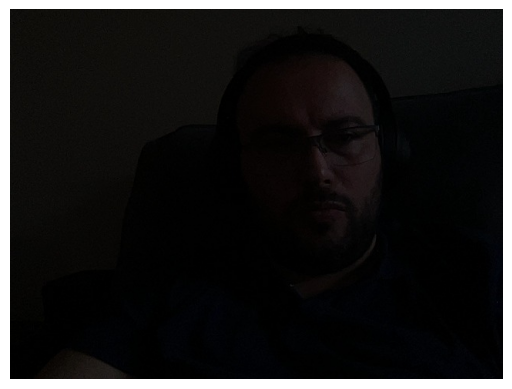

In [18]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import matplotlib.pyplot as plt

def capture_image(filename='photo.jpg'):
    js = Javascript('''
        async function captureImage() {
            const video = document.createElement('video');
            video.style.display = 'none';
            document.body.appendChild(video);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await new Promise((resolve) => {
                video.onloadedmetadata = () => {
                    video.play();
                    resolve();
                };
            });

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getTracks().forEach(track => track.stop());
            video.remove();

            return canvas.toDataURL('image/jpeg');
        }
        captureImage();
    ''')
    display(js)
    data = eval_js('captureImage()')
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

filename = capture_image()
image = cv2.imread(filename)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


<IPython.core.display.Javascript object>

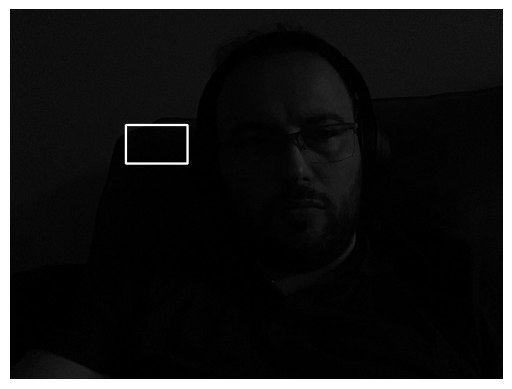

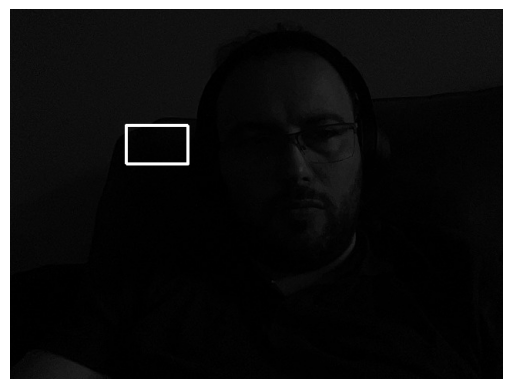

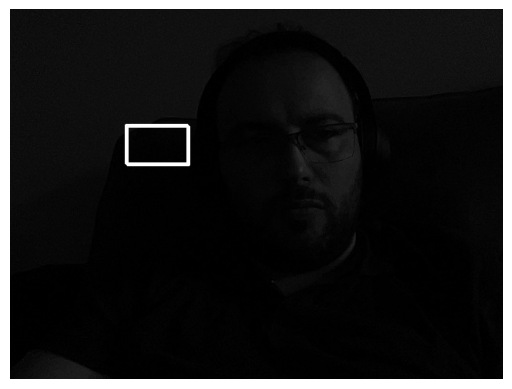

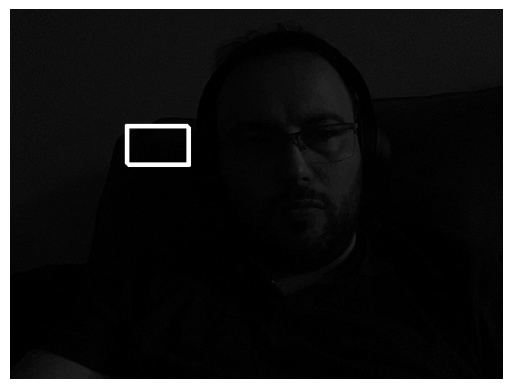

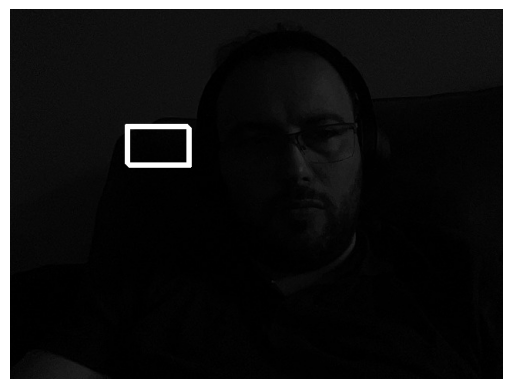

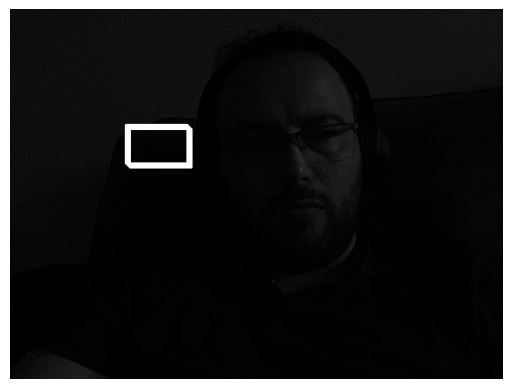

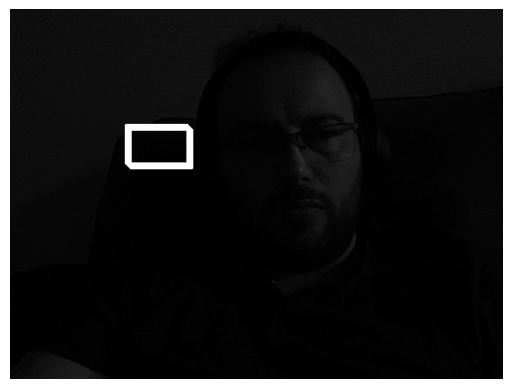

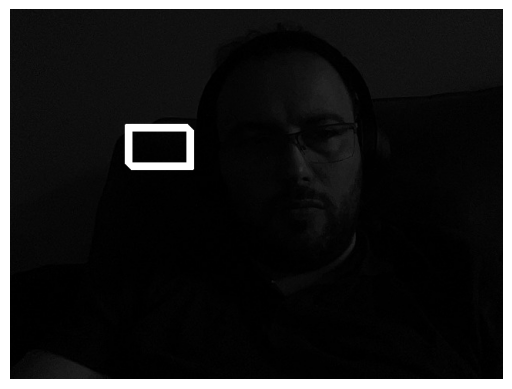

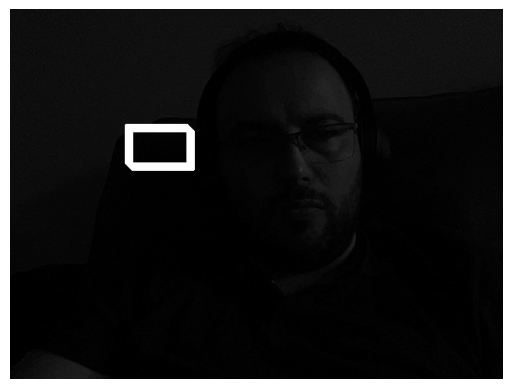

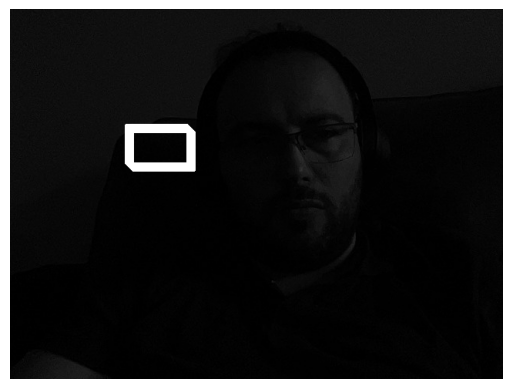

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to capture image from webcam
def capture_image(filename='photo.jpg'):
    js = Javascript('''
        async function captureImage() {
            const video = document.createElement('video');
            video.style.display = 'none';
            document.body.appendChild(video);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await new Promise((resolve) => {
                video.onloadedmetadata = () => {
                    video.play();
                    resolve();
                };
            });

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getTracks().forEach(track => track.stop());
            video.remove();

            return canvas.toDataURL('image/jpeg');
        }
        captureImage();
    ''')
    display(js)
    data = eval_js('captureImage()')
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture image from webcam
filename = capture_image()
image = cv2.imread(filename)

# Your existing processing code
Start = np.random.randint(1, 160)
Top = Start
Left = Start
Right = Left + 80
Butt = Top + 50
Step = 5
H_Step = 1
V_Step = 1
Frame_Count = 0

while Frame_Count < 10:  # Adjust the loop condition for demonstration
    if Butt > 240 or Top == 0:
        V_Step = V_Step * -1
        Top = Top + V_Step
        Butt = Butt + V_Step
    else:
        Top = Top + V_Step
        Butt = Butt + V_Step

    if Right > 320 or Left == 0:
        H_Step = H_Step * -1
        Right = Right + H_Step
        Left = Left + H_Step
    else:
        Right = Right + H_Step
        Left = Left + H_Step

    cv2.rectangle(image, (Left, Top), (Right, Butt), (255, 255, 255), 2)

    frameROI = image[Top:Butt, Left:Right]
    frameROI_BACKUP = frameROI.copy()
    grayROI = cv2.cvtColor(frameROI, cv2.COLOR_BGR2GRAY)
    BGRROI = cv2.cvtColor(grayROI, cv2.COLOR_GRAY2BGR)
    image[Top:Butt, Left:Right] = BGRROI

    grayHW = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    Gray2BGRHW = cv2.cvtColor(grayHW, cv2.COLOR_GRAY2BGR)
    Gray2BGRHW[Top:Butt, Left:Right] = frameROI_BACKUP

    plt.imshow(cv2.cvtColor(Gray2BGRHW, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    Frame_Count += 1
